In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [46]:
baseball_df = pd.read_csv('data/fullData.csv')
baseball_df

,JOIN,team_id,team_side,date,start_time,doubleheader,time_of_day,sky,field_condition,precipitation,...,pos9_int_start_distance_h,pitcher_run_exp_h,run_exp_h,dayOfWeek,duration,score,opp_score,scoreLine,opp_ScoreLine,winLoss
0,45015BALDH0,BAL,Away,3/30/2023,3/30/2023 14:10,0,Day,Sunny,Unknown,NaN,...,302,-5.5,5.5,Thu,190,10,9,100430200,100102032,Win
1,45015BOSDH0,BOS,Home,3/30/2023,3/30/2023 14:10,0,Day,Sunny,Unknown,NaN,...,305,-2.4,2.4,Thu,190,9,10,100102032,100430200,Loss
2,45015CHCDH0,CHC,Home,3/30/2023,3/30/2023 13:20,0,Day,Sunny,Unknown,NaN,...,301,0.6,-0.6,Thu,141,4,0,00400000x,000000000,Win
3,45015MILDH0,MIL,Away,3/30/2023,3/30/2023 13:20,0,Day,Sunny,Unknown,NaN,...,296,4.9,-4.9,Thu,141,0,4,000000000,00400000x,Loss
4,45015CINDH0,CIN,Home,3/30/2023,3/30/2023 16:10,0,Day,Sunny,Unknown,NaN,...,303,0.1,-0.1,Thu,182,4,5,100120000,001300010,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,45200SFDH0,SF,Home,10/1/2023,10/1/2023 12:05,0,Day,Cloudy,Unknown,NaN,...,300,2.4,-2.4,Sun,164,2,5,000001010,000005000,Loss
4856,45200TBDH0,TB,Away,10/1/2023,10/1/2023 15:07,0,Day,Cloudy,Unknown,NaN,...,281,-5.9,5.9,Sun,167,12,8,170111100,030003110,Win
4857,45200TORDH0,TOR,Home,10/1/2023,10/1/2023 15:07,0,Day,Cloudy,Unknown,NaN,...,289,-3.1,3.1,Sun,167,8,12,030003110,170111100,Loss
4858,45200ATLDH0,ATL,Home,10/1/2023,10/1/2023 15:10,0,Day,Cloudy,Unknown,NaN,...,299,-4.4,4.4,Sun,189,9,10,203000211,410000023,Loss


In [47]:
baseball_df = baseball_df.drop(columns=['time_of_day', 'sky', 'field_condition', 'precipitation', 'wind_direction', 'park_id', 'attendance', 'wind_speed_mph', 'dayOfWeek']);

In [48]:
baseball_df.head()

,JOIN,team_id,team_side,date,start_time,doubleheader,temperature_fahrenheit,is_interleague,series_id,season_game_number,...,pos8_int_start_distance_h,pos9_int_start_distance_h,pitcher_run_exp_h,run_exp_h,duration,score,opp_score,scoreLine,opp_ScoreLine,winLoss
0,45015BALDH0,BAL,Away,3/30/2023,3/30/2023 14:10,0,38,False,BOS202303300,1,...,324,302,-5.5,5.5,190,10,9,100430200,100102032,Win
1,45015BOSDH0,BOS,Home,3/30/2023,3/30/2023 14:10,0,38,False,BOS202303300,1,...,325,305,-2.4,2.4,190,9,10,100102032,100430200,Loss
2,45015CHCDH0,CHC,Home,3/30/2023,3/30/2023 13:20,0,42,False,CHN202303300,1,...,327,301,0.6,-0.6,141,4,0,00400000x,000000000,Win
3,45015MILDH0,MIL,Away,3/30/2023,3/30/2023 13:20,0,42,False,CHN202303300,1,...,320,296,4.9,-4.9,141,0,4,000000000,00400000x,Loss
4,45015CINDH0,CIN,Home,3/30/2023,3/30/2023 16:10,0,61,False,CIN202303300,1,...,325,303,0.1,-0.1,182,4,5,100120000,001300010,Loss


In [49]:
columns_list = baseball_df.isnull()

print("Columns of the baseball_df dataframe:")
for column in columns_list:
    print(column)

Columns of the baseball_df dataframe:
JOIN
team_id
team_side
date
start_time
doubleheader
temperature_fahrenheit
is_interleague
series_id
season_game_number
series_game_number
days_since_last_game
pitches_p
ba_p
iso_p
babip_p
slg_p
woba_p
xwoba_p
xba_p
hits_p
abs_p
launch_speed_p
launch_angle_p
spin_rate_p
velocity_p
effective_speed_p
whiffs_p
swings_p
takes_p
eff_min_vel_p
release_extension_p
pos3_int_start_distance_p
pos4_int_start_distance_p
pos5_int_start_distance_p
pos6_int_start_distance_p
pos7_int_start_distance_p
pos8_int_start_distance_p
pos9_int_start_distance_p
pitcher_run_exp_p
run_exp_p
pitches_h
ba_h
iso_h
babip_h
slg_h
woba_h
xwoba_h
xba_h
hits_h
abs_h
launch_speed_h
launch_angle_h
spin_rate_h
velocity_h
effective_speed_h
whiffs_h
swings_h
takes_h
eff_min_vel_h
release_extension_h
pos3_int_start_distance_h
pos4_int_start_distance_h
pos5_int_start_distance_h
pos6_int_start_distance_h
pos7_int_start_distance_h
pos8_int_start_distance_h
pos9_int_start_distance_h
pitcher_run

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(baseball_df[["days_since_last_game"]])
baseball_df['days_since_last_game'] = imputer.transform(baseball_df[['days_since_last_game']])

In [51]:
baseball_df = baseball_df.drop(columns=['pos3_int_start_distance_h','pos4_int_start_distance_h', 'pos5_int_start_distance_h', 'pos6_int_start_distance_h', 'pos7_int_start_distance_h','pos8_int_start_distance_h', 'pos9_int_start_distance_h'])

In [52]:
baseball_df = baseball_df.drop(columns=['pos3_int_start_distance_p','pos4_int_start_distance_p', 'pos5_int_start_distance_p', 'pos6_int_start_distance_p', 'pos7_int_start_distance_p','pos8_int_start_distance_p', 'pos9_int_start_distance_p'])

In [53]:
baseball_df.head()

,JOIN,team_id,team_side,date,start_time,doubleheader,temperature_fahrenheit,is_interleague,series_id,season_game_number,...,eff_min_vel_h,release_extension_h,pitcher_run_exp_h,run_exp_h,duration,score,opp_score,scoreLine,opp_ScoreLine,winLoss
0,45015BALDH0,BAL,Away,3/30/2023,3/30/2023 14:10,0,38,False,BOS202303300,1,...,-6.5,6.65,-5.5,5.5,190,10,9,100430200,100102032,Win
1,45015BOSDH0,BOS,Home,3/30/2023,3/30/2023 14:10,0,38,False,BOS202303300,1,...,-2.7,6.52,-2.4,2.4,190,9,10,100102032,100430200,Loss
2,45015CHCDH0,CHC,Home,3/30/2023,3/30/2023 13:20,0,42,False,CHN202303300,1,...,0.5,6.47,0.6,-0.6,141,4,0,00400000x,000000000,Win
3,45015MILDH0,MIL,Away,3/30/2023,3/30/2023 13:20,0,42,False,CHN202303300,1,...,-0.3,5.91,4.9,-4.9,141,0,4,000000000,00400000x,Loss
4,45015CINDH0,CIN,Home,3/30/2023,3/30/2023 16:10,0,61,False,CIN202303300,1,...,0.2,6.43,0.1,-0.1,182,4,5,100120000,001300010,Loss


In [54]:
baseball_df = baseball_df.drop(columns=['series_id', 'series_game_number', 'is_interleague']);

In [55]:
baseball_df.head()

,JOIN,team_id,team_side,date,start_time,doubleheader,temperature_fahrenheit,season_game_number,days_since_last_game,pitches_p,...,eff_min_vel_h,release_extension_h,pitcher_run_exp_h,run_exp_h,duration,score,opp_score,scoreLine,opp_ScoreLine,winLoss
0,45015BALDH0,BAL,Away,3/30/2023,3/30/2023 14:10,0,38,1,1.0,153,...,-6.5,6.65,-5.5,5.5,190,10,9,100430200,100102032,Win
1,45015BOSDH0,BOS,Home,3/30/2023,3/30/2023 14:10,0,38,1,1.0,191,...,-2.7,6.52,-2.4,2.4,190,9,10,100102032,100430200,Loss
2,45015CHCDH0,CHC,Home,3/30/2023,3/30/2023 13:20,0,42,1,1.0,133,...,0.5,6.47,0.6,-0.6,141,4,0,00400000x,000000000,Win
3,45015MILDH0,MIL,Away,3/30/2023,3/30/2023 13:20,0,42,1,1.0,124,...,-0.3,5.91,4.9,-4.9,141,0,4,000000000,00400000x,Loss
4,45015CINDH0,CIN,Home,3/30/2023,3/30/2023 16:10,0,61,1,1.0,178,...,0.2,6.43,0.1,-0.1,182,4,5,100120000,001300010,Loss


In [56]:
baseball_df['winLoss_numeric'] = baseball_df['winLoss'].map({'Win': 1, 'Loss': 0});
baseball_df

,JOIN,team_id,team_side,date,start_time,doubleheader,temperature_fahrenheit,season_game_number,days_since_last_game,pitches_p,...,release_extension_h,pitcher_run_exp_h,run_exp_h,duration,score,opp_score,scoreLine,opp_ScoreLine,winLoss,winLoss_numeric
0,45015BALDH0,BAL,Away,3/30/2023,3/30/2023 14:10,0,38,1,1.0,153,...,6.65,-5.5,5.5,190,10,9,100430200,100102032,Win,1
1,45015BOSDH0,BOS,Home,3/30/2023,3/30/2023 14:10,0,38,1,1.0,191,...,6.52,-2.4,2.4,190,9,10,100102032,100430200,Loss,0
2,45015CHCDH0,CHC,Home,3/30/2023,3/30/2023 13:20,0,42,1,1.0,133,...,6.47,0.6,-0.6,141,4,0,00400000x,000000000,Win,1
3,45015MILDH0,MIL,Away,3/30/2023,3/30/2023 13:20,0,42,1,1.0,124,...,5.91,4.9,-4.9,141,0,4,000000000,00400000x,Loss,0
4,45015CINDH0,CIN,Home,3/30/2023,3/30/2023 16:10,0,61,1,1.0,178,...,6.43,0.1,-0.1,182,4,5,100120000,001300010,Loss,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,45200SFDH0,SF,Home,10/1/2023,10/1/2023 12:05,0,64,162,1.0,173,...,6.66,2.4,-2.4,164,2,5,000001010,000005000,Loss,0
4856,45200TBDH0,TB,Away,10/1/2023,10/1/2023 15:07,0,79,162,1.0,155,...,6.57,-5.9,5.9,167,12,8,170111100,030003110,Win,1
4857,45200TORDH0,TOR,Home,10/1/2023,10/1/2023 15:07,0,79,162,1.0,166,...,6.82,-3.1,3.1,167,8,12,030003110,170111100,Loss,0
4858,45200ATLDH0,ATL,Home,10/1/2023,10/1/2023 15:10,0,81,162,1.0,165,...,6.27,-4.4,4.4,189,9,10,203000211,410000023,Loss,0


In [ ]:
#plot a correlation matrix
import seaborn as sns

only_num_df = baseball_df.drop(columns=['JOIN', 'team_id', 'team_side','date', 'start_time','scoreLine', 'winLoss'])

only_num_df.head()

In [62]:
only_num_df = only_num_df.drop(columns=['opp_ScoreLine'])

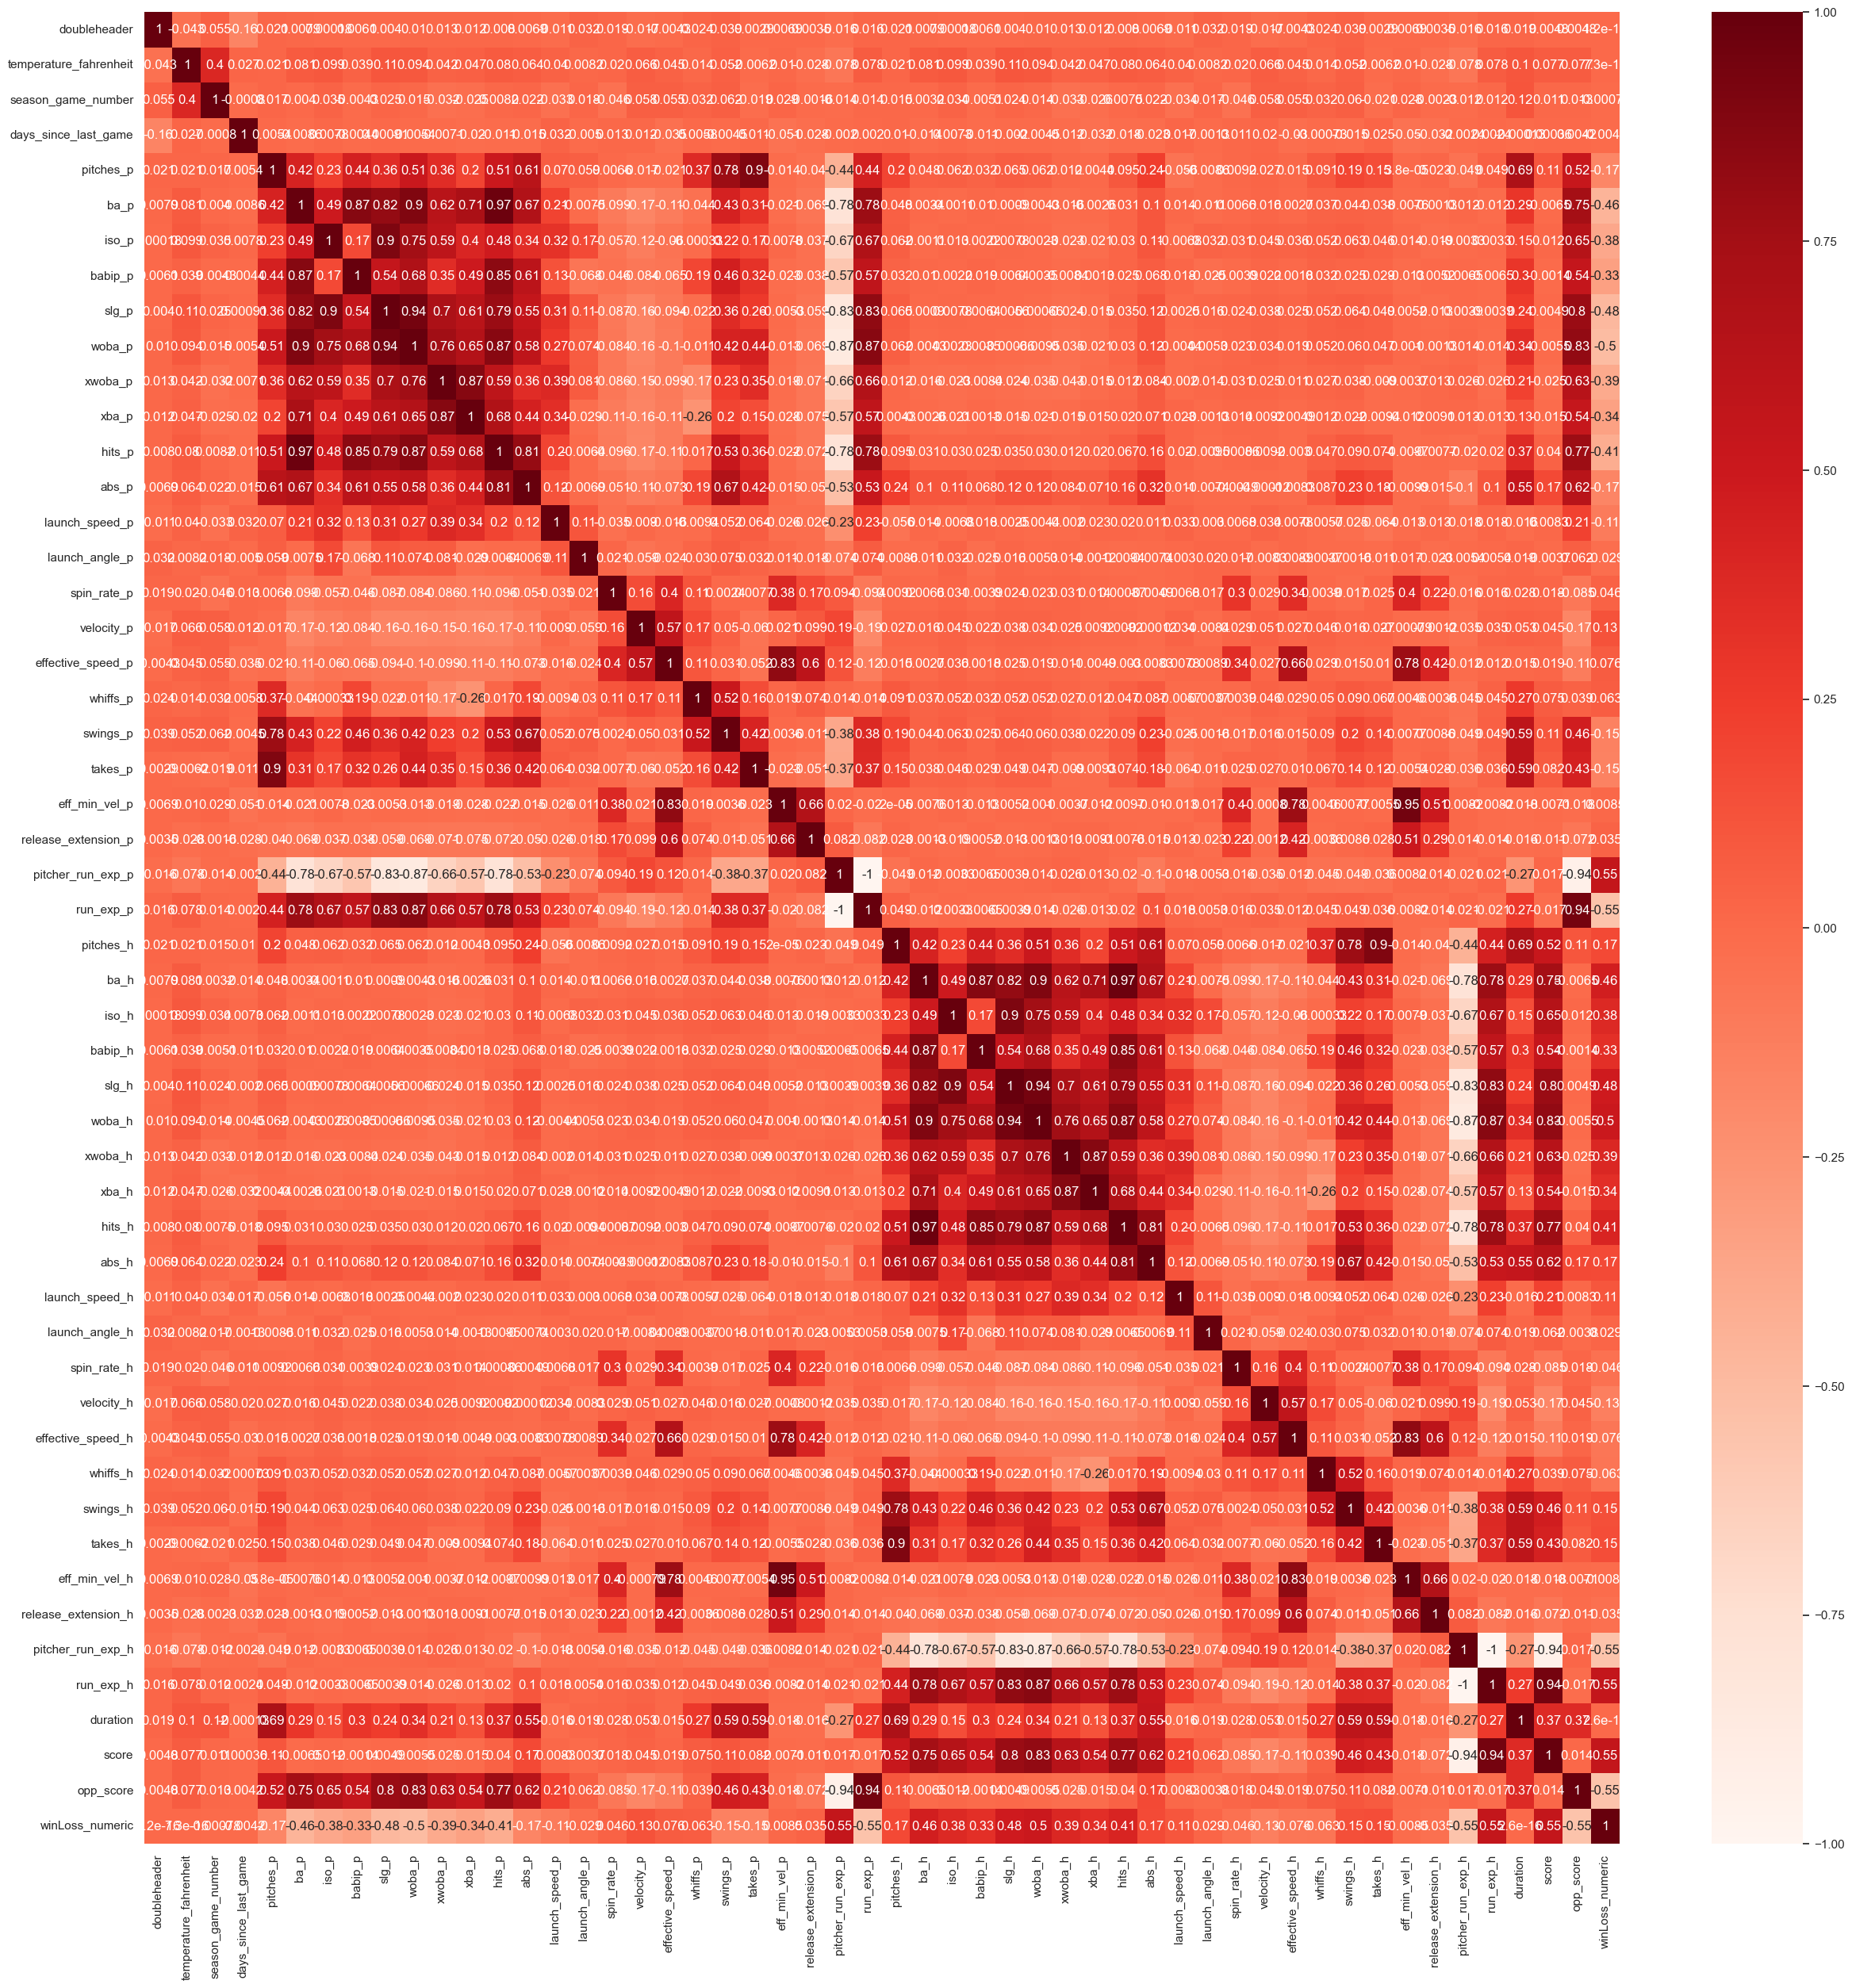

In [63]:
plt.figure(figsize=(30,30))
cor = only_num_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [64]:
cor_target = abs(cor["winLoss_numeric"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

woba_p               0.504257
pitcher_run_exp_p    0.554517
run_exp_p            0.554517
woba_h               0.504257
pitcher_run_exp_h    0.554517
run_exp_h            0.554517
score                0.552242
opp_score            0.552242
winLoss_numeric      1.000000
Name: winLoss_numeric, dtype: float64